In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart_data = pd.read_csv("dataset_heart.csv")

In [3]:
heart_data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

### Column related to heart data :- 
- Absence (1) or presence (2) of heart disease
- During an exercise stress test, a patient's heart is monitored while they perform physical exercise. The ST segment on an electrocardiogram (ECG) represents a specific part of the cardiac electrical activity. 
- The "oldpeak" value quantifies the magnitude of this ST segment depression. 
- "major vessels" this columns is typically represented as an integer ranging from 0 to 3, indicating the count of coronary vessels that are observed and colored during the procedure.
- "thal" refers to a variable that represents the results of a thallium stress test or myocardial perfusion imaging. This test is used to assess blood flow to the heart muscle and detect potential abnormalities.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect.

In [5]:
heart_data["heart disease"] = heart_data["heart disease"].map({1:0,2:1})

In [6]:
heart_data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [7]:
heart_data.nunique()

age                                      41
sex                                       2
chest pain type                           4
resting blood pressure                   47
serum cholestoral                       144
fasting blood sugar                       2
resting electrocardiographic results      3
max heart rate                           90
exercise induced angina                   2
oldpeak                                  39
ST segment                                3
major vessels                             4
thal                                      3
heart disease                             2
dtype: int64

In [8]:
heart_data.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


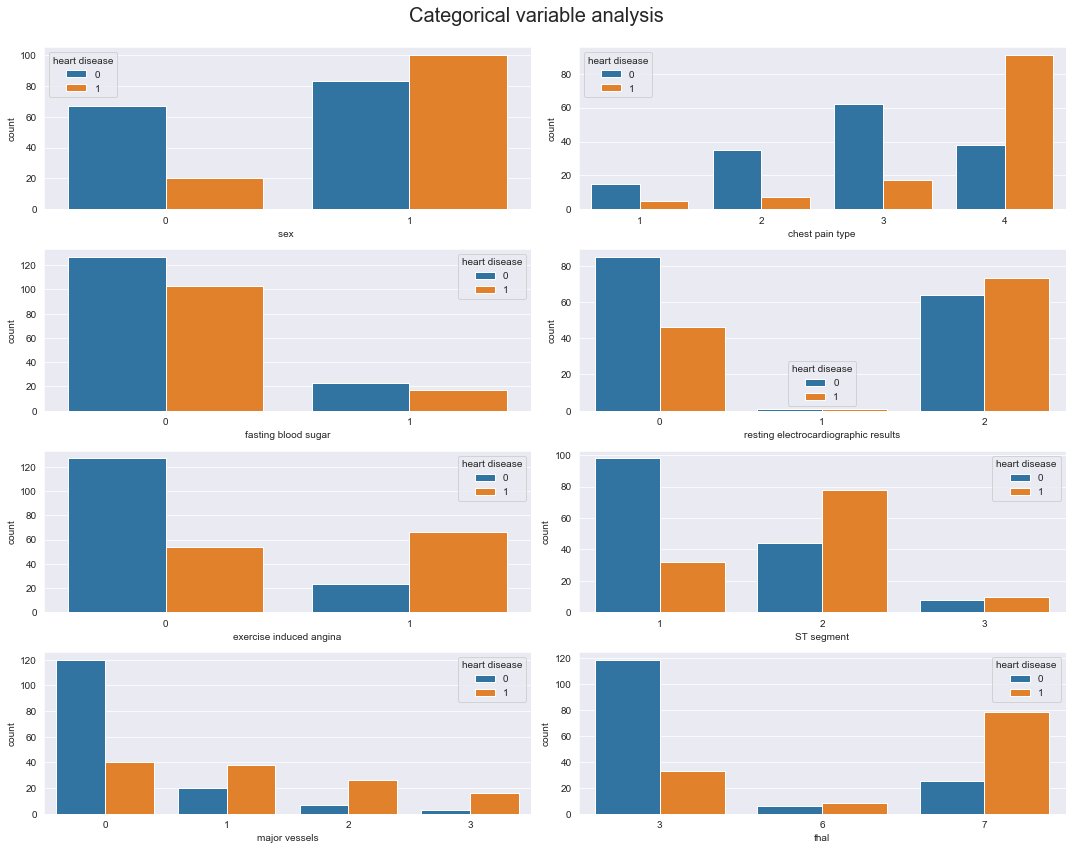

In [9]:
## Let do some visualization
sns.set_style("darkgrid")
required_column = ["sex ","chest pain type","fasting blood sugar","resting electrocardiographic results","exercise induced angina","ST segment","major vessels","thal"]
fig1, ax1 = plt.subplots(ncols=2, nrows=4, figsize=(15,12))
for i, j in zip(required_column, ax1.flatten()):
    sns.countplot(x=i,data=heart_data,ax=j,hue="heart disease")
    

fig1.suptitle('Categorical variable analysis', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


Here for heart disease 1 refers to absence of heart disease while 2 refers to presence of heart disease.

In [10]:
heart_data.dtypes

age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
heart disease                             int64
dtype: object

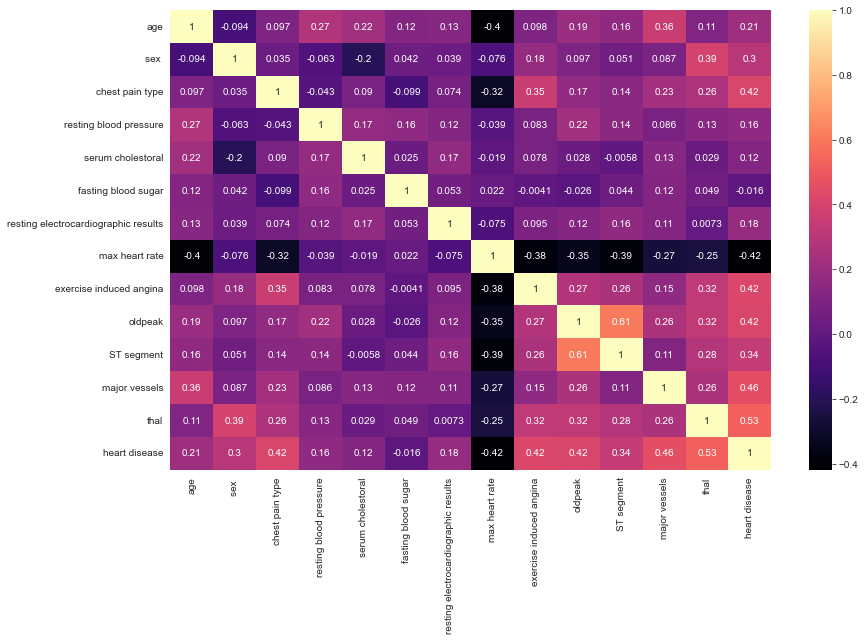

In [11]:
plt.figure(figsize=(13,9))
sns.heatmap(heart_data.corr(),annot=True,cmap="magma")
plt.tight_layout()
plt.show()

In [12]:
heart_data.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

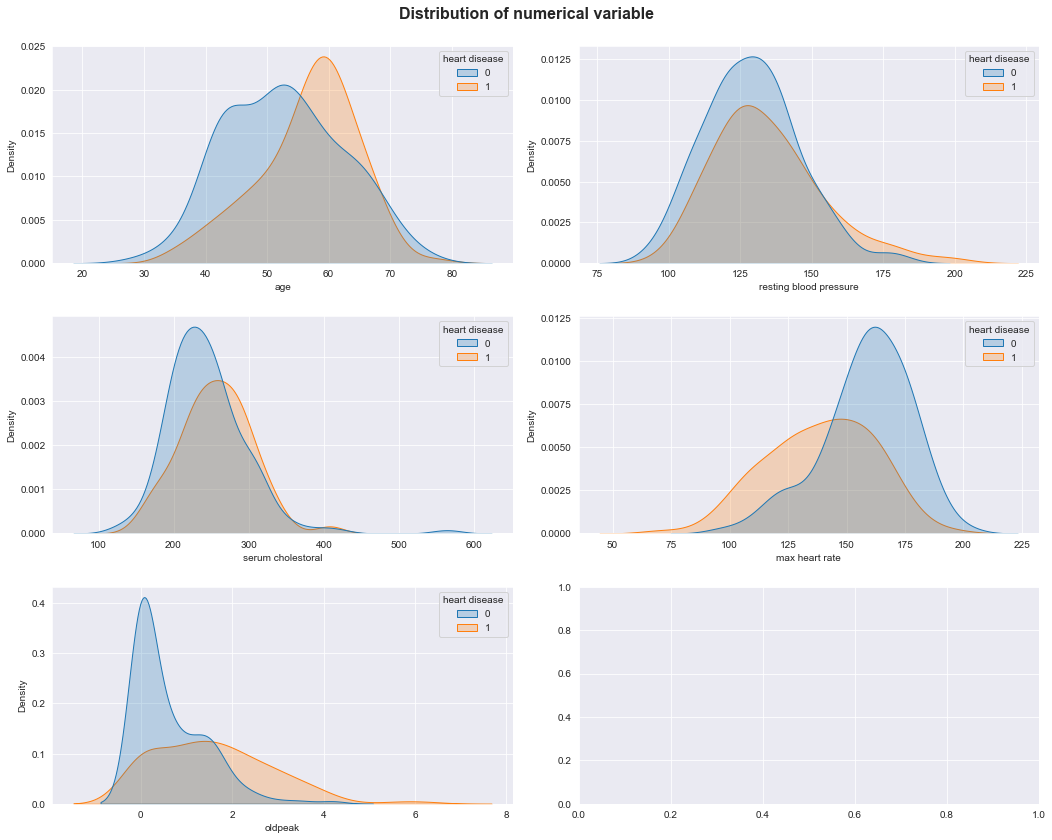

In [13]:
## columns for checking distribution of variable :-
columns = ["age","resting blood pressure","serum cholestoral","max heart rate","oldpeak"]
fig,ax = plt.subplots(ncols=2,nrows=3,figsize=(15,12))
for i,j in zip(columns,ax.flatten()):
    sns.kdeplot(i,data=heart_data,hue="heart disease",ax=j,fill=True)
    
plt.suptitle("Distribution of numerical variable",fontweight="bold",fontsize=16)
sns.set(font_scale = 1.6)
plt.tight_layout()
plt.show()

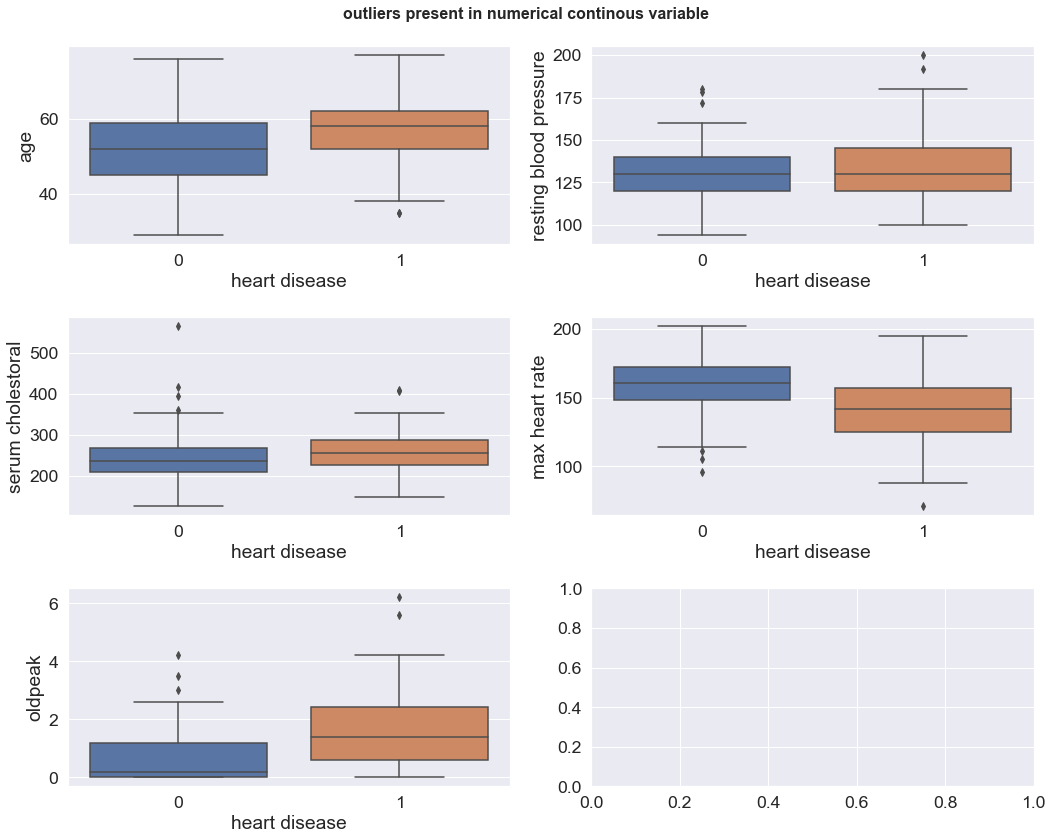

In [14]:
columns = ["age","resting blood pressure","serum cholestoral","max heart rate","oldpeak"]
fig,ax = plt.subplots(ncols=2,nrows=3,figsize=(15,12))
for i,j in zip(columns,ax.flatten()):
    sns.boxplot(y=i,x=heart_data["heart disease"],data=heart_data,ax=j)
    
plt.suptitle("outliers present in numerical continous variable",fontweight="bold",fontsize=16)
sns.set(font_scale = 1.6)
plt.tight_layout()
plt.show()

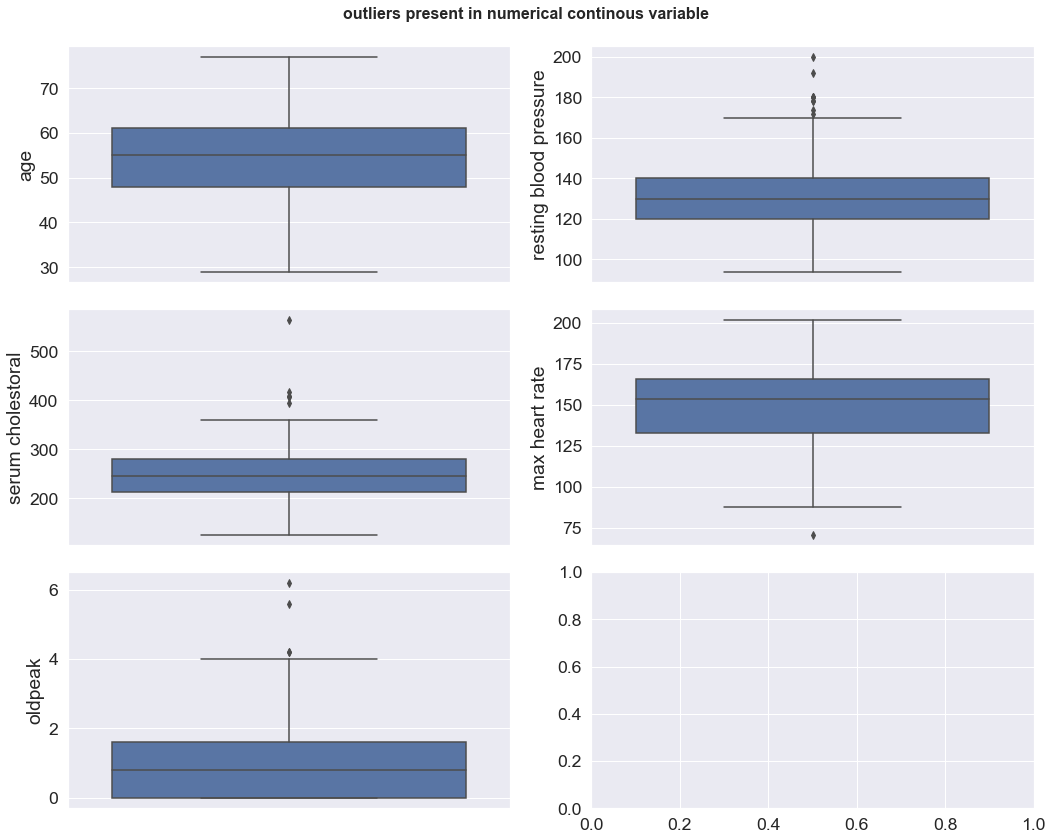

In [15]:
columns = ["age","resting blood pressure","serum cholestoral","max heart rate","oldpeak"]
fig,ax = plt.subplots(ncols=2,nrows=3,figsize=(15,12))
for i,j in zip(columns,ax.flatten()):
    sns.boxplot(y=i,data=heart_data,ax=j)
    
plt.suptitle("outliers present in numerical continous variable",fontweight="bold",fontsize=16)
sns.set(font_scale = 1.6)
plt.tight_layout()
plt.show()

In [16]:
heart_data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


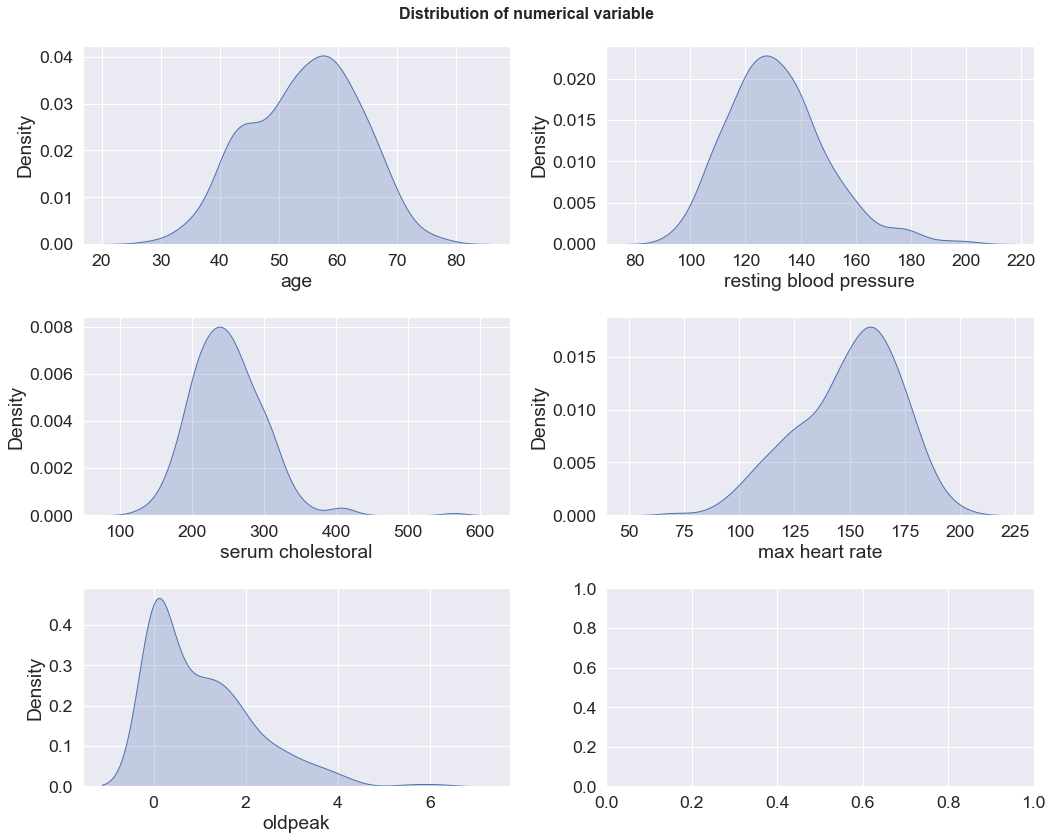

In [17]:
columns = ["age","resting blood pressure","serum cholestoral","max heart rate","oldpeak"]
fig,ax = plt.subplots(ncols=2,nrows=3,figsize=(15,12))
for i,j in zip(columns,ax.flatten()):
    sns.kdeplot(i,data=heart_data,ax=j,fill=True)
    
plt.suptitle("Distribution of numerical variable",fontweight="bold",fontsize=16)
sns.set(font_scale = 1.6)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

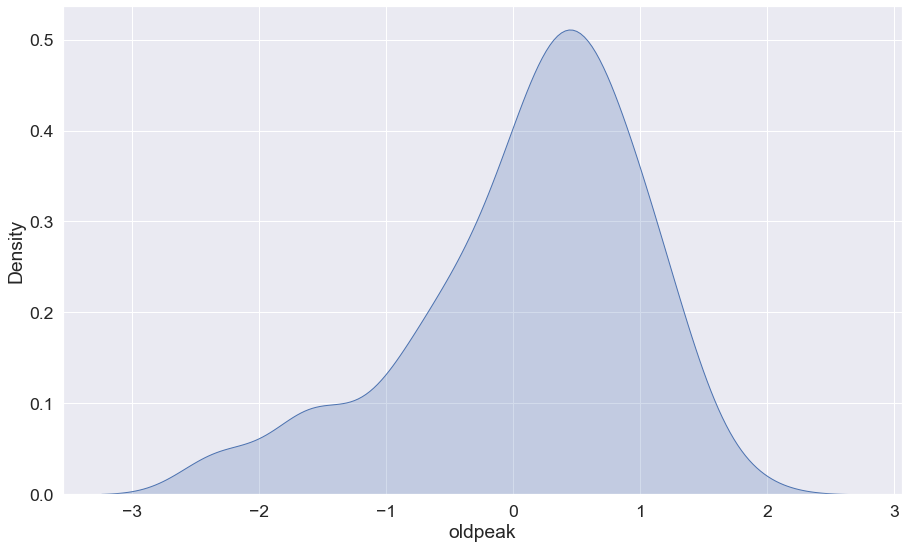

In [18]:
new_oldpeak = np.log(heart_data["oldpeak"])
plt.figure(figsize=(13,8))
_ = sns.kdeplot(new_oldpeak,fill=True)
plt.tight_layout()
plt.show

In [19]:
heart_data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [20]:
## We already checkout the relation between discrete numerical variable and our target variable which is "heart disease"
## Now let's do some eda on continous numerical variable and it's relationship with our target varible
for i in columns:
    print("The minimum value present in the column of {} is {}".format(i,min(heart_data[i])))
    print("The maximum value present in the column of {} is {}".format(i,max(heart_data[i])))
          

The minimum value present in the column of age is 29
The maximum value present in the column of age is 77
The minimum value present in the column of resting blood pressure is 94
The maximum value present in the column of resting blood pressure is 200
The minimum value present in the column of serum cholestoral is 126
The maximum value present in the column of serum cholestoral is 564
The minimum value present in the column of max heart rate is 71
The maximum value present in the column of max heart rate is 202
The minimum value present in the column of oldpeak is 0.0
The maximum value present in the column of oldpeak is 6.2


In [21]:
heart_data["heart disease"].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [22]:
## Both the values are balanched

In [23]:
### Let's do some age wise analysis of presence of heart disease
d1 = heart_data.copy()
d1["Age_Category"]=" "
d1.loc[d1["age"]<=12,"Age_Category"]="Children"
d1.loc[(d1["age"]>12) & (d1["age"]<=19),"Age_Category"]="Teenager"
d1.loc[(d1["age"]>19) & (d1["age"]<=29),"Age_Category"]="Young Adults"
d1.loc[(d1["age"]>29) & (d1["age"]<=55),"Age_Category"]="Adults"
d1.loc[(d1["age"]>55) & (d1["age"]<=75),"Age_Category"]="Senior Citizen"
d1.loc[(d1["age"]>75) ,"Age_Category"]="Elderly"

In [24]:
d1.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease,Age_Category
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1,Senior Citizen
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0,Senior Citizen
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1,Senior Citizen
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0,Senior Citizen
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0,Senior Citizen


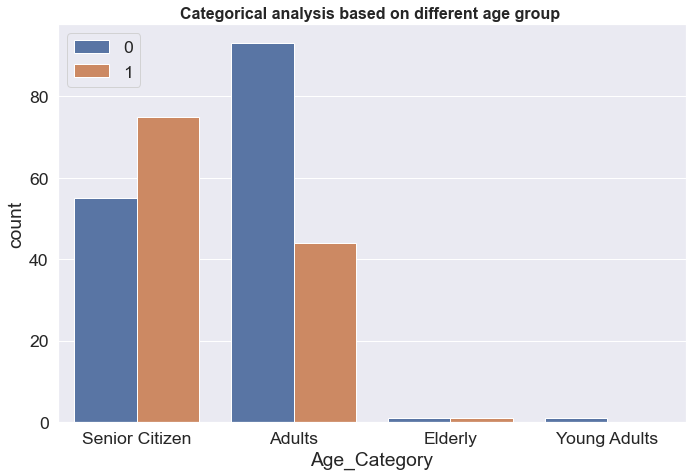

In [25]:
plt.figure(figsize=(10,7))
_ = sns.countplot("Age_Category",data=d1,hue="heart disease")
plt.title("Categorical analysis based on different age group ",fontsize=16,fontweight="bold")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [26]:
## All the analysis is done now we are in the model developnment phase let's begin

The main aim of this prediction model is to correctly classify all the instances of heart disease, so the performance metric we should use should be recall

And the model that i will developing will be random forest, logistic regression, svm, knn, xgboost

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, recall_score, classification_report

In [28]:
heart_data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [29]:
heart_data.dtypes

age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
heart disease                             int64
dtype: object

In [30]:
predictor = heart_data.drop("heart disease",axis=1)
label = heart_data["heart disease"]
X_train, X_test, y_train, y_test = train_test_split(predictor, label, test_size=0.20, random_state=42)

In [31]:
## defining different model :- 
model = {
    "random_forest" : RandomForestClassifier(),
    "knn" : KNeighborsClassifier(),
    "logistic_model" : LogisticRegression(),
    "xgboost_model" : XGBClassifier()
}
parameters = {
    "random_forest" : {
    'n_estimators': [20, 40,60, 100],
    'max_depth': [5, 10,12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
},
    "logistic_model" : {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
},
    "xgboost_model" : {
    'n_estimators': [20, 40,60, 100],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
},
    "knn" : {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
    
}



In [32]:
models = ["random_forest","knn","logistic_model","xgboost_model"]
model_report = pd.DataFrame({"Models":models,"Accuracy":np.zeros(len(models)),"Recall_score":np.zeros(len(models)),"Time_taken":np.zeros(len(models))})
best_parameter = model.copy()

In [33]:
model_report

,Models,Accuracy,Recall_score,Time_taken
0,random_forest,0.0,0.0,0.0
1,knn,0.0,0.0,0.0
2,logistic_model,0.0,0.0,0.0
3,xgboost_model,0.0,0.0,0.0


In [34]:
import time
for i in models:
    grid = GridSearchCV(model[i],param_grid=parameters[i],scoring="recall",cv=4)
    start = time.time()
    grid.fit(X_train,y_train)
    end = time.time()
    y_pred = grid.predict(X_test)
    best_parameter[i]=grid.best_params_
    model_report.loc[model_report["Models"]==i,"Time_taken"]=round(end-start,2)
    model_report.loc[model_report["Models"]==i,"Accuracy"]=accuracy_score(y_test,y_pred)
    model_report.loc[model_report["Models"]==i,"Recall_score"]=recall_score(y_test,y_pred)

In [35]:
model_report

,Models,Accuracy,Recall_score,Time_taken
0,random_forest,0.796296,0.666667,112.67
1,knn,0.703704,0.571429,0.31
2,logistic_model,0.907407,0.761905,0.52
3,xgboost_model,0.796296,0.619048,12.18


Based on the above hyperparameter tuning the model with highest recall score and accuracy is logistic regression model, so we will provide forward by taking that model into consideration

In [36]:
print(best_parameter["logistic_model"])

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [40]:
logistic_model = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs')

In [41]:
logistic_model.fit(X_train,y_train)
print("The accuracy of this model is {}".format(accuracy_score(y_train,logistic_model.predict(X_train))))
print("The recall score of this model is {}".format(recall_score(y_train,logistic_model.predict(X_train))))

The accuracy of this model is 0.8518518518518519
The recall score of this model is 0.797979797979798


In [46]:
## Let see the classfication report
report = classification_report(y_train,logistic_model.predict(X_train),output_dict=True)

In [48]:
report

{'0': {'precision': 0.84,
  'recall': 0.8974358974358975,
  'f1-score': 0.8677685950413223,
  'support': 117},
 '1': {'precision': 0.8681318681318682,
  'recall': 0.797979797979798,
  'f1-score': 0.8315789473684211,
  'support': 99},
 'accuracy': 0.8518518518518519,
 'macro avg': {'precision': 0.854065934065934,
  'recall': 0.8477078477078477,
  'f1-score': 0.8496737712048716,
  'support': 216},
 'weighted avg': {'precision': 0.8528937728937729,
  'recall': 0.8518518518518519,
  'f1-score': 0.8511816731912426,
  'support': 216}}

In [47]:
report.keys()

dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])

In [49]:
from sklearn.metrics import confusion_matrix

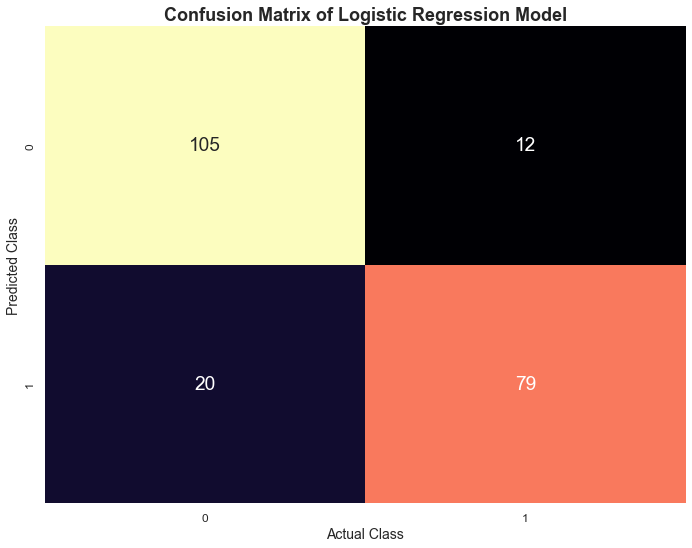

In [55]:
plt.figure(figsize=(10, 8))
confusion_mat = confusion_matrix(y_train, logistic_model.predict(X_train))
sns.heatmap(confusion_mat, annot=True, cmap='magma', fmt='d', cbar=False)
plt.title("Confusion Matrix of Logistic Regression Model", fontsize=18, fontweight='bold')
plt.xlabel("Actual Class", fontsize=14)
plt.ylabel("Predicted Class", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [57]:
### Let's calculate the accuracy score and recall score on testing dataset


In [56]:
print("The accuracy of this model is {}".format(accuracy_score(y_test,logistic_model.predict(X_test))))
print("The recall score of this model is {}".format(recall_score(y_test,logistic_model.predict(X_test))))

The accuracy of this model is 0.9074074074074074
The recall score of this model is 0.7619047619047619


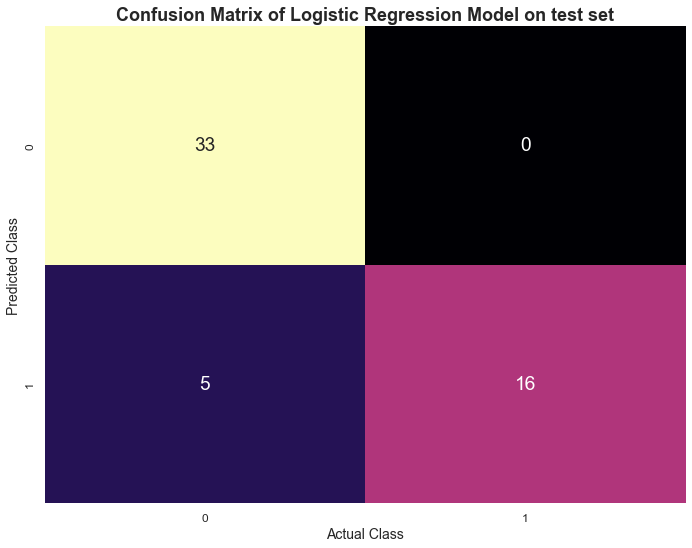

In [58]:
plt.figure(figsize=(10, 8))
confusion_mat = confusion_matrix(y_test,logistic_model.predict(X_test))
sns.heatmap(confusion_mat, annot=True, cmap='magma', fmt='d', cbar=False)
plt.title("Confusion Matrix of Logistic Regression Model on test set", fontsize=18, fontweight='bold')
plt.xlabel("Actual Class", fontsize=14)
plt.ylabel("Predicted Class", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [59]:
import pickle

In [60]:
pickle.dump(logistic_model,open("model.pkl","wb"))

In [61]:
## Our stage is set for the frontend development